# **Data Analysis**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Extract Full Text from PDFs**

In [8]:
%cd /content/drive/MyDrive/Papers
%ls -1 | wc -l

/content/drive/MyDrive/Papers
177


In [9]:
%pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.6 MB/s eta 0:00:00


In [11]:
import os
import pandas as pd
from PyPDF2 import PdfReader

def extract_text_from_pdfs(directory_path):
  pdf_data = []
  print(os.listdir(directory_path))
  for filename in os.listdir(directory_path):
    if filename.endswith(".pdf"):
      pdf_path = os.path.join(directory_path, filename)
      print(pdf_path)

      with open(pdf_path, "rb") as file:
        reader = PdfReader(file)
        text = ""
        for page_num in range(len(reader.pages)):
          page = reader.pages[page_num]
          text += page.extract_text()

    pdf_data.append({"title": filename, "text": text})
  return pd.DataFrame(pdf_data)

full_text_df = extract_text_from_pdfs('.')
full_text_df

['a comparative study of english to kannada baseline machine translation system with general and bible text corpus.pdf', 'a comparison of transformer, recurrent neural networks and smt in tamil to sinhala mt.pdf', 'a morpheme-based weighting for chinese-mongolian statistical machine translation.pdf', 'a morphological analyser for maltese.pdf', 'a multi-agent solution for managing complexity in english to sinhala machine translation.pdf', 'a multi-source approach for breton-french hybrid machine translation.pdf', 'a novel framework for sanskrit-gujarati symbolic machine translation system.pdf', 'a novel morphological analysis based approach for dynamic detection of inflected gujarati idioms.pdf', 'a parallel corpora for bi-directional neural machine translation for low resourced ethiopian languages.pdf', 'a study of kannada to english baseline statistical machine translation system.pdf', 'a systematic analysis of subwords and cross-lingual transfer in multilingual translation.pdf', 'a t

./hindi to dravidian language neural machine translation systems.pdf
./impacts of approaches for agglutinative-lrl neural machine translation (nmt)- a case study on manipuri-english pair.pdf
./implementation of neural machine translation for nahuatl as a web platform- a focus on text translation.pdf
./hybrid approaches for augmentation of translation tables for indian languages.pdf
./hybrid sub-word segmentation for handling long tail in morphologically rich low resource languages.pdf
./improved spoken uyghur segmentation for neural machine translation.pdf
./improved unsupervised neural machine translation with semantically weighted back translation for morphologically rich and low resource languages.pdf
./improving english-assamese neural machine translation using transliteration-based approach.pdf
./improving mongolian-chinese neural machine translation with morphological noise.pdf
./improving neural machine translation for low-resource indian languages using rule-based feature extra

./sanskrit-gujarati constituency mapper for machine translation system.pdf
./semi-supervised learning for mongolian morphological segmentation.pdf
./sentence embedding models for ancient greek using multilingual knowledge distillation.pdf
./sentence structure analysis based on semantic relations of cyrillic mongolian.pdf
./shortcomings of llms for low-resource translation- retrieval and understanding are both the problem.pdf
./statistical and neural machine translation for manipuri-english on intelligence domain.pdf
./statistical machine translation from and into morphologically rich and low resourced languages.pdf
./statistical sandhi splitter and its effect on nlp applications.pdf
./structural biases for improving transformers on translation into morphologically rich languages.pdf
./sub-word embedding auxiliary encoding in mongolian-chinese neural machine translation.pdf
./test set sampling affects system rankings- expanded human evaluation of wmt20 english-inuktitut systems.pdf
./th

,title,text
0,a comparative study of english to kannada base...,International Journal of Applied Engineering R...
1,"a comparison of transformer, recurrent neural ...",2020 20th International Conference on Advances...
2,a morpheme-based weighting for chinese-mongoli...,"IEICE TRANS. INF. & SYST., VOL.E99–D, NO.11 NO..."
3,a morphological analyser for maltese.pdf,ScienceDirect\nAvailable online at www.science...
4,a multi-agent solution for managing complexity...,"B. Hettige et al., Int. J. of Design & Nature ..."
...,...,...
172,automated arabic-arabic sign language translat...,International Journal of Advances in Applied S...
173,bbns low-resource machine translation for the ...,Mach Translat (2018) 32:45–57\nhttps://doi.org...
174,a machine translation system from arabic sign ...,Vol.:(0123456789)1 3Universal Access in the In...
175,automatic translation of arabic text-to-arabic...,Vol.:(0123456789)1 3Universal Access in the In...


In [ ]:
full_text_df.to_csv('full-text.csv', index=False)

# **Extract Morphology Keywords from Full Text**

In [13]:
search_words = ['analytic', 'synthetic', 'polysynthetic', 'isolating', 'fusional', 'agglutinat', 'symbolic']

def find_search_words(row, search_words):
  found_words = []
  for word in search_words:
    if word.lower() in row['text'].lower() and word not in found_words:
      found_words.append(word)
  return ', '.join(found_words)

full_text_df['morphology'] = full_text_df.apply(lambda row: find_search_words(row, search_words), axis=1)
full_text_df

,title,text,morphology
0,a comparative study of english to kannada base...,International Journal of Applied Engineering R...,agglutinat
1,"a comparison of transformer, recurrent neural ...",2020 20th International Conference on Advances...,agglutinat
2,a morpheme-based weighting for chinese-mongoli...,"IEICE TRANS. INF. & SYST., VOL.E99–D, NO.11 NO...",
3,a morphological analyser for maltese.pdf,ScienceDirect\nAvailable online at www.science...,fusional
4,a multi-agent solution for managing complexity...,"B. Hettige et al., Int. J. of Design & Nature ...",
...,...,...,...
172,automated arabic-arabic sign language translat...,International Journal of Advances in Applied S...,"synthetic, symbolic"
173,bbns low-resource machine translation for the ...,Mach Translat (2018) 32:45–57\nhttps://doi.org...,agglutinat
174,a machine translation system from arabic sign ...,Vol.:(0123456789)1 3Universal Access in the In...,
175,automatic translation of arabic text-to-arabic...,Vol.:(0123456789)1 3Universal Access in the In...,symbolic


In [14]:
full_text_df.to_csv('full-text.csv', index=False)

In [16]:
def get_morphology_counts(df, column, word):
  for word in search_words:
    count = len(df[df[column].str.contains(word)])
    print(f'{word}: {count}')

get_morphology_counts(full_text_df, 'morphology', search_words)

none = (full_text_df['morphology'] == '').sum()
print('none:', none)

analytic: 20
synthetic: 63
polysynthetic: 26
isolating: 3
fusional: 15
agglutinat: 83
symbolic: 13
none: 52


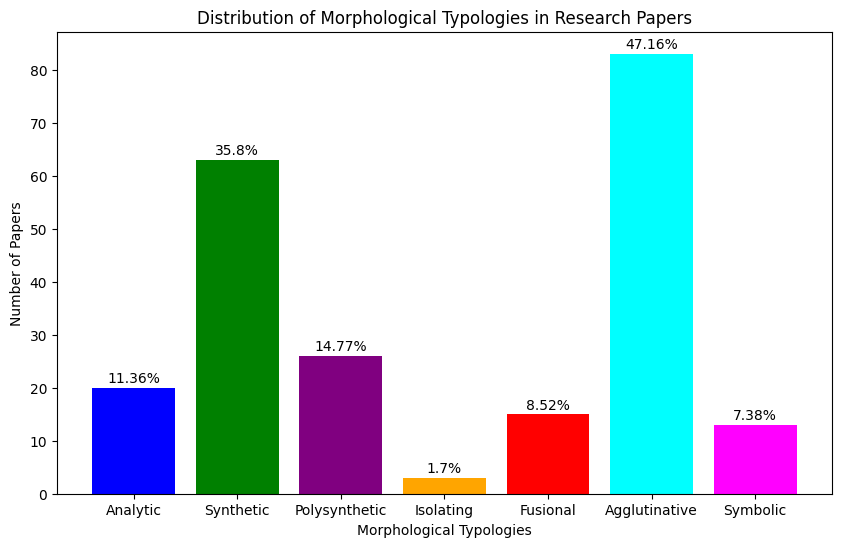

In [67]:
import matplotlib.pyplot as plt

categories = ["Analytic", "Synthetic", "Polysynthetic", "Isolating", "Fusional", "Agglutinative", "Symbolic"]
counts = [20, 63, 26, 3, 15, 83, 13]
percentages = [11.36, 35.80, 14.77, 1.70, 8.52, 47.16, 7.38]

plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=["blue", "green", "purple", "orange", "red", "cyan", "magenta"])

plt.xlabel("Morphological Typologies")
plt.ylabel("Number of Papers")
plt.title("Distribution of Morphological Typologies in Research Papers")

for i, (count, percentage) in enumerate(zip(counts, percentages)):
    plt.text(i, count + 1, f"{percentage}%", ha='center', fontsize=10)

plt.show()

# **Extract Methodology Keywords from Full Text**

In [17]:
def search(title_abstract_keywords, words, category, categories):
  for word in words:
    if word.lower() in title_abstract_keywords and word not in categories:
      categories.add(category)
  return categories

def find_search_words(row):
  for column in ['text']:
    title_abstract_keywords = row[column].lower()
    categories = search(title_abstract_keywords, ['analyzer', 'analyser'], 'morphological analyzer', set())
    categories = search(title_abstract_keywords, ['segmentation'], 'segmentation', categories)
    categories = search(title_abstract_keywords, ['subword model', 'sub-word model', 'sub word model'], 'subword modeling', categories)
    categories = search(title_abstract_keywords, ['formal grammar'], 'formal grammar', categories)
    categories = search(title_abstract_keywords, ['new corpus', 'new dataset'], 'corpus creation', categories)
    categories = search(title_abstract_keywords, ['augment'], 'data augmentation', categories)
    categories = search(title_abstract_keywords, ['sign language'], 'sign language', categories)
  return ', '.join(categories)

full_text_df['methodology'] = full_text_df.apply(lambda row: find_search_words(row), axis=1)
full_text_df

,title,text,morphology,methodology
0,a comparative study of english to kannada base...,International Journal of Applied Engineering R...,agglutinat,data augmentation
1,"a comparison of transformer, recurrent neural ...",2020 20th International Conference on Advances...,agglutinat,"morphological analyzer, segmentation"
2,a morpheme-based weighting for chinese-mongoli...,"IEICE TRANS. INF. & SYST., VOL.E99–D, NO.11 NO...",,segmentation
3,a morphological analyser for maltese.pdf,ScienceDirect\nAvailable online at www.science...,fusional,morphological analyzer
4,a multi-agent solution for managing complexity...,"B. Hettige et al., Int. J. of Design & Nature ...",,morphological analyzer
...,...,...,...,...
172,automated arabic-arabic sign language translat...,International Journal of Advances in Applied S...,"synthetic, symbolic","morphological analyzer, segmentation, sign lan..."
173,bbns low-resource machine translation for the ...,Mach Translat (2018) 32:45–57\nhttps://doi.org...,agglutinat,"morphological analyzer, segmentation, data aug..."
174,a machine translation system from arabic sign ...,Vol.:(0123456789)1 3Universal Access in the In...,,"morphological analyzer, sign language"
175,automatic translation of arabic text-to-arabic...,Vol.:(0123456789)1 3Universal Access in the In...,symbolic,"morphological analyzer, sign language"


In [20]:
full_text_df.to_csv('full-text.csv', index=False)

In [21]:
def get_counts(df, column, words):
  for word in words:
    count = len(df[df[column].str.contains(word)])
    print(f'{word}: {count}')

methodologies = ['morphological analyzer', 'subword modeling', 'segmentation', 'formal grammar', 'corpus creation', 'data augmentation', 'sign language']
get_counts(full_text_df, 'methodology', methodologies)

none = (full_text_df['morphology'] == '').sum()
print('none:', none)

morphological analyzer: 70
subword modeling: 12
segmentation: 102
formal grammar: 1
corpus creation: 6
data augmentation: 61
sign language: 10
none: 52


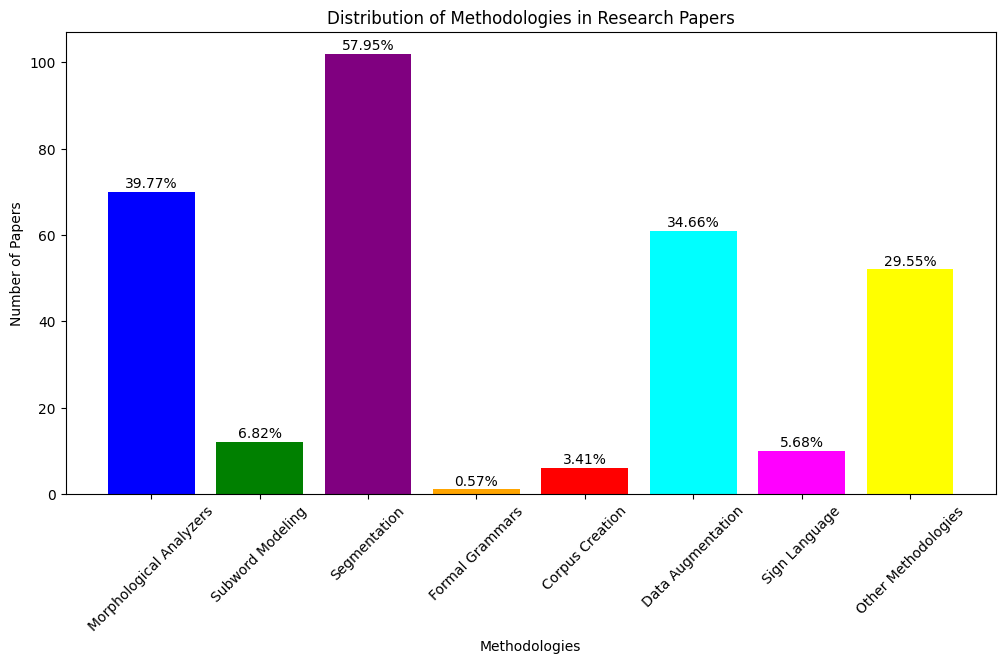

In [71]:
import matplotlib.pyplot as plt

categories = ["Morphological Analyzers", "Subword Modeling", "Segmentation", "Formal Grammars", "Corpus Creation", "Data Augmentation", "Sign Language", "Other Methodologies"]
counts = [70, 12, 102, 1, 6, 61, 10, 52]
percentages = [39.77, 6.82, 57.95, 0.57, 3.41, 34.66, 5.68, 29.55]

plt.figure(figsize=(12, 6))
plt.bar(categories, counts, color=["blue", "green", "purple", "orange", "red", "cyan", "magenta", "yellow"])

plt.xlabel("Methodologies")
plt.ylabel("Number of Papers")
plt.title("Distribution of Methodologies in Research Papers")
plt.xticks(rotation=45)

for i, (count, percentage) in enumerate(zip(counts, percentages)):
    plt.text(i, count + 1, f"{percentage}%", ha='center', fontsize=10)

plt.show()

# **Add Metadata for Languages**

In [54]:
%cd /content/drive/MyDrive/Data

included_papers_df = pd.read_csv('included-papers.csv')
print('included papers count:', len(included_papers_df))
included_papers_df

# Requires our shared csv of papers that are included after manual abstract review

/content/drive/MyDrive/Data
included papers count: 176


,title,languages
0,the imagact4all ontology of animated images: i...,"magahi (0), assamese (1), tibetan (1), odia (1..."
1,"utilizing lexical similarity between related, ...","malayalam (1), telugu (1), gujarati (1), marat..."
2,lost in translation: analysis of information l...,"nahuatl (1), spanish (5), wixarika (0), yorem ..."
3,using morphemes from agglutinative languages l...,"quechua (1), spanish (5)"
4,using the nunavut hansard data for experiments...,"inuktitut (1), english (5)"
...,...,...
171,bleu skies for endangered language revitalizat...,"rusyn (1), ukrainian (3), english (5)"
172,improving english-assamese neural machine tran...,"assamese (1), english (5)"
173,kansan: kannada-sanskrit parallel corpus const...,"kannada (1), sanskrit (2)"
174,morpheme based amharic-kistanigna bi-direction...,"amharic (2), kistanigna (0)"


In [17]:
# languages_dict = {}
# def get_languages(row):
#   languages = row['languages']
#   languages = languages.split(', ')
#   for lang in languages:
#     # languages_dict[language] = languages_dict.get(language, 0) + 1
#     lang_class = lang[-2:-1]
#     language = lang[:-4]
#     languages_dict[(language, lang_class)] = languages_dict.get((language, lang_class), 0) + 1

# included_papers_df.apply(lambda row: get_languages(row), axis=1)
# for (language, lang_class), count in languages_dict.items():
#   print(language, lang_class, count)

In [55]:
def get_classes(row):
  languages = row['languages'].split(', ')
  classes = {}
  for i in range(6):
    for language in languages:
      if str(i) in language:
        classes[i] = classes.get(i, 0) + 1
  return classes

included_papers_df['classes'] = included_papers_df.apply(lambda row: get_classes(row), axis=1)
included_papers_df

,title,languages,classes
0,the imagact4all ontology of animated images: i...,"magahi (0), assamese (1), tibetan (1), odia (1...","{0: 1, 1: 4, 2: 2, 3: 3, 4: 2, 5: 1}"
1,"utilizing lexical similarity between related, ...","malayalam (1), telugu (1), gujarati (1), marat...","{1: 3, 2: 1, 3: 3, 4: 1}"
2,lost in translation: analysis of information l...,"nahuatl (1), spanish (5), wixarika (0), yorem ...","{0: 2, 1: 1, 5: 1}"
3,using morphemes from agglutinative languages l...,"quechua (1), spanish (5)","{1: 1, 5: 1}"
4,using the nunavut hansard data for experiments...,"inuktitut (1), english (5)","{1: 1, 5: 1}"
...,...,...,...
171,bleu skies for endangered language revitalizat...,"rusyn (1), ukrainian (3), english (5)","{1: 1, 3: 1, 5: 1}"
172,improving english-assamese neural machine tran...,"assamese (1), english (5)","{1: 1, 5: 1}"
173,kansan: kannada-sanskrit parallel corpus const...,"kannada (1), sanskrit (2)","{1: 1, 2: 1}"
174,morpheme based amharic-kistanigna bi-direction...,"amharic (2), kistanigna (0)","{0: 1, 2: 1}"


In [58]:
from numpy import int64

def split_dict_column(df, column_name):
    df.drop(columns=[0, 1, 2, 3, 4, 5], inplace=True)
    normalized_df = pd.json_normalize(df[column_name]).fillna(0).astype(int64).replace(0, '')
    df = pd.concat([df, normalized_df], axis=1)
    return df

included_papers_df = split_dict_column(included_papers_df, 'classes')
included_papers_df

,title,languages,classes,0,1,2,3,4,5
0,the imagact4all ontology of animated images: i...,"magahi (0), assamese (1), tibetan (1), odia (1...","{0: 1, 1: 4, 2: 2, 3: 3, 4: 2, 5: 1}",1,4,2,3,2,1
1,"utilizing lexical similarity between related, ...","malayalam (1), telugu (1), gujarati (1), marat...","{1: 3, 2: 1, 3: 3, 4: 1}",,3,1,3,1,
2,lost in translation: analysis of information l...,"nahuatl (1), spanish (5), wixarika (0), yorem ...","{0: 2, 1: 1, 5: 1}",2,1,,,,1
3,using morphemes from agglutinative languages l...,"quechua (1), spanish (5)","{1: 1, 5: 1}",,1,,,,1
4,using the nunavut hansard data for experiments...,"inuktitut (1), english (5)","{1: 1, 5: 1}",,1,,,,1
...,...,...,...,...,...,...,...,...,...
171,bleu skies for endangered language revitalizat...,"rusyn (1), ukrainian (3), english (5)","{1: 1, 3: 1, 5: 1}",,1,,1,,1
172,improving english-assamese neural machine tran...,"assamese (1), english (5)","{1: 1, 5: 1}",,1,,,,1
173,kansan: kannada-sanskrit parallel corpus const...,"kannada (1), sanskrit (2)","{1: 1, 2: 1}",,1,1,,,
174,morpheme based amharic-kistanigna bi-direction...,"amharic (2), kistanigna (0)","{0: 1, 2: 1}",1,,1,,,


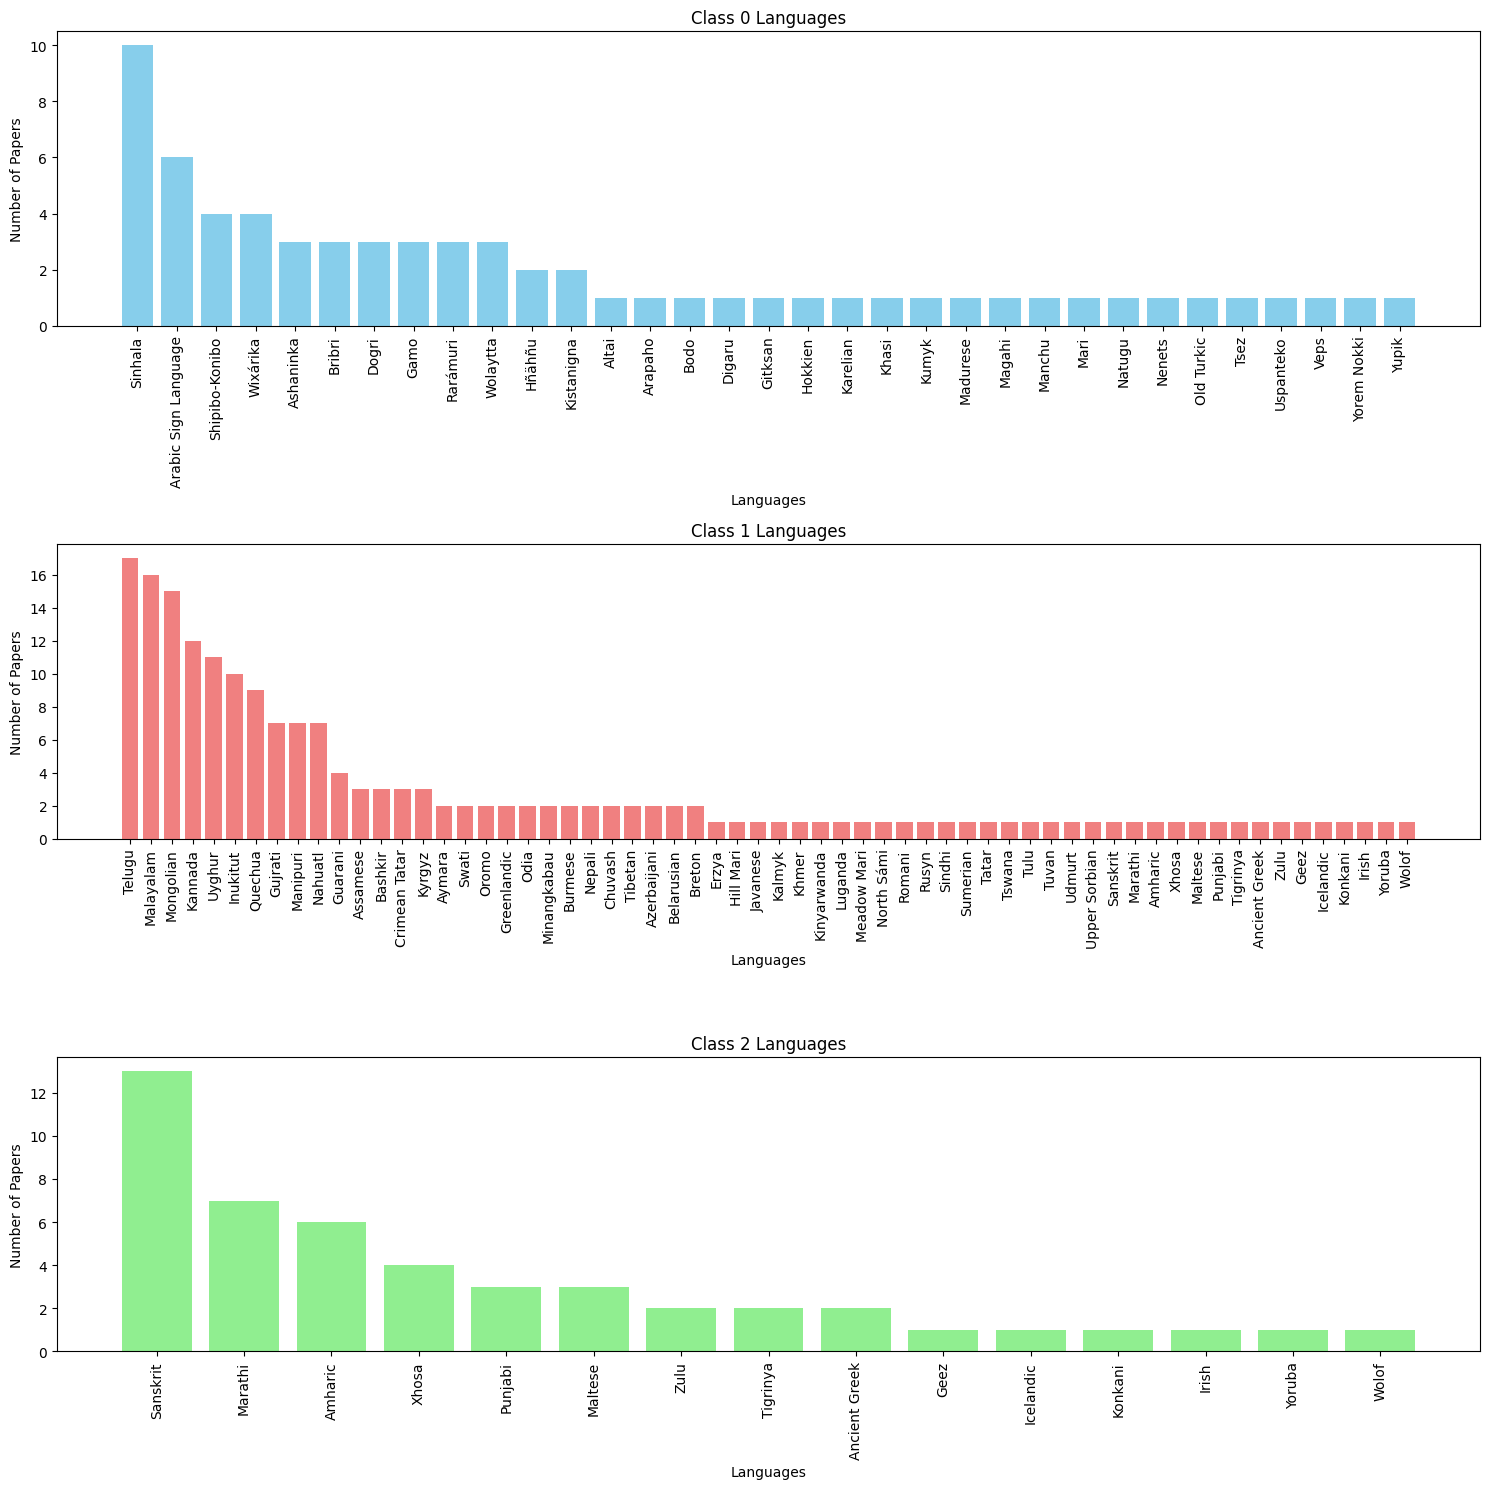

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each class and their corresponding language names
languages_class_0 = [
    "Sinhala", "Arabic Sign Language", "Shipibo-Konibo", "Wixárika",
    "Ashaninka", "Bribri", "Dogri", "Gamo", "Rarámuri", "Wolaytta",
    "Hñähñu", "Kistanigna", "Altai", "Arapaho", "Bodo", "Digaru",
    "Gitksan", "Hokkien", "Karelian", "Khasi", "Kumyk", "Madurese",
    "Magahi", "Manchu", "Mari", "Natugu", "Nenets", "Old Turkic",
    "Tsez", "Uspanteko", "Veps", "Yorem Nokki", "Yupik"
]
class_0_counts = [10, 6, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

languages_class_1 = [
    "Telugu", "Malayalam", "Mongolian", "Kannada", "Uyghur", "Inukitut",
    "Quechua", "Gujrati", "Manipuri", "Nahuatl", "Guarani", "Assamese",
    "Bashkir", "Crimean Tatar", "Kyrgyz", "Aymara", "Swati", "Oromo",
    "Greenlandic", "Odia", "Minangkabau", "Burmese", "Nepali", "Chuvash",
    "Tibetan", "Azerbaijani", "Belarusian", "Breton", "Erzya", "Hill Mari",
    "Javanese", "Kalmyk", "Khmer", "Kinyarwanda", "Luganda", "Meadow Mari",
    "North Sámi", "Romani", "Rusyn", "Sindhi", "Sumerian", "Tatar", "Tswana",
    "Tulu", "Tuvan", "Udmurt", "Upper Sorbian", "Sanskrit", "Marathi", "Amharic",
    "Xhosa", "Maltese", "Punjabi", "Tigrinya", "Ancient Greek", "Zulu", "Geez",
    "Icelandic", "Konkani", "Irish", "Yoruba", "Wolof"
]
class_1_counts = [17, 16, 15, 12, 11, 10, 9, 7, 7, 7, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

languages_class_2 = [
    "Sanskrit", "Marathi", "Amharic", "Xhosa", "Punjabi", "Maltese",
    "Zulu", "Tigrinya", "Ancient Greek", "Geez", "Icelandic", "Konkani",
    "Irish", "Yoruba", "Wolof"
]
class_2_counts = [13, 7, 6, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1]

# Ensure all counts have the same length by padding shorter lists with zeros
max_len = max(len(languages_class_0), len(languages_class_1), len(languages_class_2))

# Padding the counts lists with zeros to match the max length
class_0_counts_padded = class_0_counts + [0] * (max_len - len(class_0_counts))
class_1_counts_padded = class_1_counts + [0] * (max_len - len(class_1_counts))
class_2_counts_padded = class_2_counts + [0] * (max_len - len(class_2_counts))

# Create separate charts for each class
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

# Plot for Class 0
axs[0].bar(languages_class_0, class_0_counts_padded[:len(languages_class_0)], color='skyblue')
axs[0].set_xlabel("Languages")
axs[0].set_ylabel("Number of Papers")
axs[0].set_title("Class 0 Languages")
axs[0].tick_params(axis='x', rotation=90)

# Plot for Class 1
axs[1].bar(languages_class_1, class_1_counts_padded[:len(languages_class_1)], color='lightcoral')
axs[1].set_xlabel("Languages")
axs[1].set_ylabel("Number of Papers")
axs[1].set_title("Class 1 Languages")
axs[1].tick_params(axis='x', rotation=90)

# Plot for Class 2
axs[2].bar(languages_class_2, class_2_counts_padded[:len(languages_class_2)], color='lightgreen')
axs[2].set_xlabel("Languages")
axs[2].set_ylabel("Number of Papers")
axs[2].set_title("Class 2 Languages")
axs[2].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [59]:
import pandas as pd

included_languages_df = pd.read_csv('included-languages.csv')
print('included languages count:', len(included_languages_df))

included_languages_df

included languages count: 130


,count,language,class,language name,country,continent,morphological typology
0,21,chinese,5,Chinese,China,Asia,isolating
1,2,french,5,French,France,Europe,fusional
2,5,german,5,German,Germany,Europe,fusional
3,2,japanese,5,Japanese,Japan,Asia,agglutinative
4,8,arabic,5,Arabic,Saudi Arabia,Asia,fusional
...,...,...,...,...,...,...,...
125,2,aymara,1,Aymara,Bolivia,South America,agglutinative
126,4,guarani,1,Guaraní,Paraguay,South America,agglutinative
127,9,quechua,1,Quechua,Peru,South America,agglutinative
128,4,shipibo konibo,0,Shipibo-Konibo,Peru,South America,polysynthetic


In [60]:
languages_dict = included_languages_df.groupby('language')[['country', 'continent', 'morphological typology']].apply(lambda x: x.values.tolist()[0]).to_dict()
languages_dict

{'afrikaans': ['South Africa', 'Africa', 'fusional'],
 'altai': ['Russia', 'Asia', 'agglutinative'],
 'amharic': ['Ethiopia', 'Africa', 'fusional'],
 'ancient greek': ['Greece', 'Europe', 'fusional'],
 'arabic': ['Saudi Arabia', 'Asia', 'fusional'],
 'arabic sign language': ['Various Arab nations', 'Asia', 'isolating'],
 'arapaho': ['United States', 'North America', 'polysynthetic'],
 'ashaninka': ['Peru', 'South America', 'agglutinative'],
 'assamese': ['India', 'Asia', 'fusional'],
 'aymara': ['Bolivia', 'South America', 'agglutinative'],
 'azerbaijani': ['Azerbaijan', 'Asia', 'agglutinative'],
 'bashkir': ['Russia', 'Asia', 'agglutinative'],
 'belarusian': ['Belarus', 'Europe', 'fusional'],
 'bengali': ['Bangladesh', 'Asia', 'fusional'],
 'bodo': ['India', 'Asia', 'agglutinative'],
 'brazilian portuguese': ['Brazil', 'South America', 'fusional'],
 'breton': ['France', 'Europe', 'fusional'],
 'bribri': ['Costa Rica', 'North America', 'polysynthetic'],
 'burmese': ['Myanmar', 'Asia', 

In [61]:
def get_typologies(row):
  languages = row['languages'].split(', ')
  typologies = set()
  for language in languages:
    if '(0)' in language or '(1)' in language or '(2)' in language:
      typologies.add(languages_dict[language[:-4]][2])
  return typologies

included_papers_df['morphological typologies'] = included_papers_df.apply(lambda row: get_typologies(row), axis=1)
included_papers_df

,title,languages,classes,0,1,2,3,4,5,morphological typologies
0,the imagact4all ontology of animated images: i...,"magahi (0), assamese (1), tibetan (1), odia (1...","{0: 1, 1: 4, 2: 2, 3: 3, 4: 2, 5: 1}",1,4,2,3,2,1,"{agglutinative, fusional}"
1,"utilizing lexical similarity between related, ...","malayalam (1), telugu (1), gujarati (1), marat...","{1: 3, 2: 1, 3: 3, 4: 1}",,3,1,3,1,,"{agglutinative, fusional}"
2,lost in translation: analysis of information l...,"nahuatl (1), spanish (5), wixarika (0), yorem ...","{0: 2, 1: 1, 5: 1}",2,1,,,,1,{polysynthetic}
3,using morphemes from agglutinative languages l...,"quechua (1), spanish (5)","{1: 1, 5: 1}",,1,,,,1,{agglutinative}
4,using the nunavut hansard data for experiments...,"inuktitut (1), english (5)","{1: 1, 5: 1}",,1,,,,1,{polysynthetic}
...,...,...,...,...,...,...,...,...,...,...
171,bleu skies for endangered language revitalizat...,"rusyn (1), ukrainian (3), english (5)","{1: 1, 3: 1, 5: 1}",,1,,1,,1,{fusional}
172,improving english-assamese neural machine tran...,"assamese (1), english (5)","{1: 1, 5: 1}",,1,,,,1,{fusional}
173,kansan: kannada-sanskrit parallel corpus const...,"kannada (1), sanskrit (2)","{1: 1, 2: 1}",,1,1,,,,"{agglutinative, fusional}"
174,morpheme based amharic-kistanigna bi-direction...,"amharic (2), kistanigna (0)","{0: 1, 2: 1}",1,,1,,,,"{agglutinative, fusional}"


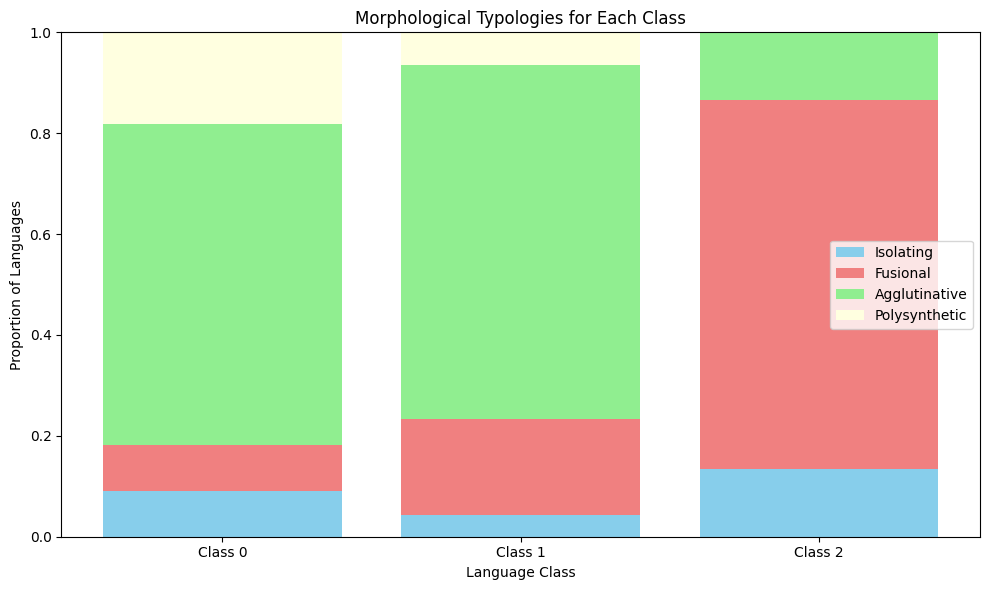

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each class and morphological typologies
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Proportions for each morphological type: Isolating, Fusional, Agglutinative, Polysynthetic
isolating = [3/33, 2/47, 2/15]  # Isolating languages proportion for each class
fusional = [3/33, 9/47, 11/15]  # Fusional languages proportion for each class
agglutinative = [21/33, 33/47, 2/15]  # Agglutinative languages proportion for each class
polysynthetic = [6/33, 3/47, 0/15]  # Polysynthetic languages proportion for each class

# Stacked bar chart data
stacked_data = np.array([isolating, fusional, agglutinative, polysynthetic])

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(class_labels, stacked_data[0], label='Isolating', color='skyblue')
ax.bar(class_labels, stacked_data[1], bottom=stacked_data[0], label='Fusional', color='lightcoral')
ax.bar(class_labels, stacked_data[2], bottom=stacked_data[0] + stacked_data[1], label='Agglutinative', color='lightgreen')
ax.bar(class_labels, stacked_data[3], bottom=stacked_data[0] + stacked_data[1] + stacked_data[2], label='Polysynthetic', color='lightyellow')

# Adding labels and title
ax.set_xlabel("Language Class")
ax.set_ylabel("Proportion of Languages")
ax.set_title("Morphological Typologies for Each Class")

# Adding legend
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()

In [62]:
def get_countries(row):
  languages = row['languages'].split(', ')
  countries = set()
  for language in languages:
    if '(0)' in language or '(1)' in language or '(2)' in language:
      countries.add(languages_dict[language[:-4]][0])
  return countries

included_papers_df['countries'] = included_papers_df.apply(lambda row: get_countries(row), axis=1)
included_papers_df

,title,languages,classes,0,1,2,3,4,5,morphological typologies,countries
0,the imagact4all ontology of animated images: i...,"magahi (0), assamese (1), tibetan (1), odia (1...","{0: 1, 1: 4, 2: 2, 3: 3, 4: 2, 5: 1}",1,4,2,3,2,1,"{agglutinative, fusional}","{Tibet, India}"
1,"utilizing lexical similarity between related, ...","malayalam (1), telugu (1), gujarati (1), marat...","{1: 3, 2: 1, 3: 3, 4: 1}",,3,1,3,1,,"{agglutinative, fusional}",{India}
2,lost in translation: analysis of information l...,"nahuatl (1), spanish (5), wixarika (0), yorem ...","{0: 2, 1: 1, 5: 1}",2,1,,,,1,{polysynthetic},{Mexico}
3,using morphemes from agglutinative languages l...,"quechua (1), spanish (5)","{1: 1, 5: 1}",,1,,,,1,{agglutinative},{Peru}
4,using the nunavut hansard data for experiments...,"inuktitut (1), english (5)","{1: 1, 5: 1}",,1,,,,1,{polysynthetic},{Canada}
...,...,...,...,...,...,...,...,...,...,...,...
171,bleu skies for endangered language revitalizat...,"rusyn (1), ukrainian (3), english (5)","{1: 1, 3: 1, 5: 1}",,1,,1,,1,{fusional},{Slovakia}
172,improving english-assamese neural machine tran...,"assamese (1), english (5)","{1: 1, 5: 1}",,1,,,,1,{fusional},{India}
173,kansan: kannada-sanskrit parallel corpus const...,"kannada (1), sanskrit (2)","{1: 1, 2: 1}",,1,1,,,,"{agglutinative, fusional}",{India}
174,morpheme based amharic-kistanigna bi-direction...,"amharic (2), kistanigna (0)","{0: 1, 2: 1}",1,,1,,,,"{agglutinative, fusional}",{Ethiopia}


In [63]:
def get_continents(row):
  languages = row['languages'].split(', ')
  continents = set()
  for language in languages:
    if '(0)' in language or '(1)' in language or '(2)' in language:
      continents.add(languages_dict[language[:-4]][1])
  return continents

included_papers_df['continents'] = included_papers_df.apply(lambda row: get_continents(row), axis=1)
included_papers_df

,title,languages,classes,0,1,2,3,4,5,morphological typologies,countries,continents
0,the imagact4all ontology of animated images: i...,"magahi (0), assamese (1), tibetan (1), odia (1...","{0: 1, 1: 4, 2: 2, 3: 3, 4: 2, 5: 1}",1,4,2,3,2,1,"{agglutinative, fusional}","{Tibet, India}",{Asia}
1,"utilizing lexical similarity between related, ...","malayalam (1), telugu (1), gujarati (1), marat...","{1: 3, 2: 1, 3: 3, 4: 1}",,3,1,3,1,,"{agglutinative, fusional}",{India},{Asia}
2,lost in translation: analysis of information l...,"nahuatl (1), spanish (5), wixarika (0), yorem ...","{0: 2, 1: 1, 5: 1}",2,1,,,,1,{polysynthetic},{Mexico},{North America}
3,using morphemes from agglutinative languages l...,"quechua (1), spanish (5)","{1: 1, 5: 1}",,1,,,,1,{agglutinative},{Peru},{South America}
4,using the nunavut hansard data for experiments...,"inuktitut (1), english (5)","{1: 1, 5: 1}",,1,,,,1,{polysynthetic},{Canada},{North America}
...,...,...,...,...,...,...,...,...,...,...,...,...
171,bleu skies for endangered language revitalizat...,"rusyn (1), ukrainian (3), english (5)","{1: 1, 3: 1, 5: 1}",,1,,1,,1,{fusional},{Slovakia},{Europe}
172,improving english-assamese neural machine tran...,"assamese (1), english (5)","{1: 1, 5: 1}",,1,,,,1,{fusional},{India},{Asia}
173,kansan: kannada-sanskrit parallel corpus const...,"kannada (1), sanskrit (2)","{1: 1, 2: 1}",,1,1,,,,"{agglutinative, fusional}",{India},{Asia}
174,morpheme based amharic-kistanigna bi-direction...,"amharic (2), kistanigna (0)","{0: 1, 2: 1}",1,,1,,,,"{agglutinative, fusional}",{Ethiopia},{Africa}


In [64]:
from collections import Counter

def get_counts(df, column_name):
  all_elements = []
  for s in df[column_name]:
    all_elements.extend(list(s))
  return pd.Series(Counter(all_elements)).sort_values(ascending=False)

morphology_counts = get_counts(included_papers_df, 'morphological typologies')
morphology_counts

,0
agglutinative,121
fusional,49
polysynthetic,20
isolating,12


In [65]:
country_counts = get_counts(included_papers_df, 'countries')
print(len(country_counts))
country_counts

45


,0
India,58
Mongolia,15
China,13
Peru,11
Canada,11
Ethiopia,10
Sri Lanka,10
Russia,7
Mexico,7
Various Arab nations,6


In [5]:
%cd /content/drive/MyDrive/Data

/content/drive/MyDrive/Data


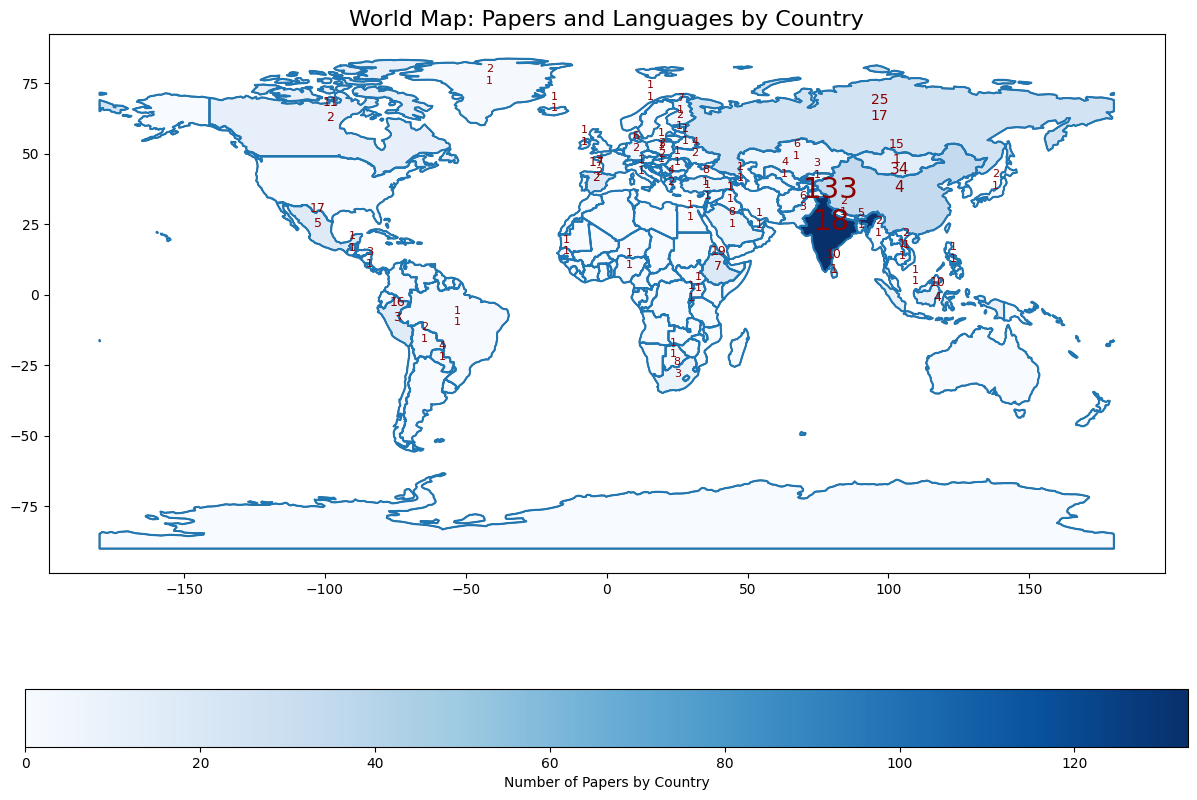

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
from collections import Counter
import requests
import zipfile
import io

# Data: List of countries and the corresponding number of papers for each country
data = [
    ("Sri Lanka", 10), ("Various Arab nations", 6), ("Mexico", 4), ("Peru", 4), ("Costa Rica", 3),
    ("Ethiopia", 3), ("Ethiopia", 3), ("India", 3), ("Mexico", 3), ("Peru", 3), ("Ethiopia", 2),
    ("Mexico", 2), ("Russia", 1), ("United States", 1), ("India", 1), ("India", 1), ("Canada", 1),
    ("China", 1), ("Russia", 1), ("India", 1), ("Russia", 1), ("Indonesia", 1), ("India", 1),
    ("China", 1), ("Russia", 1), ("Solomon Islands", 1), ("Russia", 1), ("Central Asia", 1),
    ("Russia", 1), ("Guatemala", 1), ("Russia", 1), ("Mexico", 1), ("United States", 1),
    ("India", 17), ("India", 16), ("Mongolia", 15), ("India", 12), ("China", 11), ("Canada", 10),
    ("Peru", 9), ("India", 7), ("India", 7), ("Mexico", 7), ("Paraguay", 4), ("India", 3),
    ("Kyrgyzstan", 3), ("Russia", 3), ("Ukraine", 3), ("Bolivia", 2), ("Eswatini", 2), ("Ethiopia", 2),
    ("Greenland", 2), ("India", 2), ("Indonesia", 2), ("Myanmar", 2), ("Nepal", 2), ("Russia", 2),
    ("Tibet", 2), ("Azerbaijan", 1), ("Belarus", 1), ("France", 1), ("Russia", 1), ("Russia", 1),
    ("Indonesia", 1), ("Russia", 1), ("Cambodia", 1), ("Rwanda", 1), ("Uganda", 1), ("Russia", 1),
    ("Norway", 1), ("Romania", 1), ("Slovakia", 1), ("Pakistan", 1), ("Iraq", 1), ("Russia", 1),
    ("Botswana", 1), ("India", 1), ("Russia", 1), ("Russia", 1), ("Germany", 1), ("India", 13),
    ("India", 7), ("Ethiopia", 6), ("South Africa", 4), ("Malta", 3), ("Pakistan", 3), ("Ethiopia", 2),
    ("Greece", 2), ("South Africa", 2), ("Ethiopia", 1), ("Iceland", 1), ("India", 1), ("Ireland", 1),
    ("Nigeria", 1), ("Senegal", 1), ("Egypt", 1), ("South Africa", 2), ("Bangladesh", 5), ("India", 18),
    ("Indonesia", 6), ("Kazakhstan", 6), ("Malaysia", 1), ("Pakistan", 2), ("Philippines", 1),
    ("Uzbekistan", 4), ("Estonia", 2), ("Greece", 2), ("Slovakia", 1), ("Spain", 1), ("Ukraine", 1),
    ("Vatican City", 1), ("India", 22), ("Lebanon", 1), ("Russia", 6), ("Turkey", 8), ("United Arab Emirates", 1),
    ("Vietnam", 2), ("Czech Republic", 1), ("Finland", 7), ("Hungary", 2), ("Italy", 1), ("Poland", 1),
    ("Brazil", 1), ("China", 21), ("Japan", 2), ("Saudi Arabia", 8), ("France", 2), ("Germany", 5),
    ("Spain", 16), ("United States", 80)
]

# Aggregate data by country: count number of languages and papers
country_paper_count = Counter()
country_language_count = Counter()

for country, papers in data:
    country_paper_count[country] += papers
    country_language_count[country] += 1

# # Download the world map data from Natural Earth
# url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip"
# response = requests.get(url)
# with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
#     zip_ref.extractall("world_map")

# Load world map data using geopandas
world = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# Merge the world map with the aggregated data
world['papers'] = world['NAME'].map(country_paper_count).fillna(0)
world['languages'] = world['NAME'].map(country_language_count).fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot countries with paper data
world.boundary.plot(ax=ax)
world.plot(column='papers', ax=ax, legend=True,
          legend_kwds={'label': "Number of Papers by Country", 'orientation': "horizontal"},
          cmap='Blues', edgecolor='black')

# Add country labels with number of languages and paper count
for idx, row in world.iterrows():
    country = row['NAME']
    if country in country_paper_count:
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y,
                f"{country_paper_count[country]}\n{country_language_count[country]}",
                ha='center', fontsize=8 + country_paper_count[country] // 10, color='darkred')

plt.title("World Map: Papers and Languages by Country", fontsize=16)
plt.show()


In [66]:
continent_counts = get_counts(included_papers_df, 'continents')
continent_counts

,0
Asia,116
North America,19
Africa,18
Europe,17
South America,13
Oceania,1


In [ ]:
counts = {}
def get_class_counts(row):
  classes = row['classes']
  for c, count in classes.items():
    counts[c] = counts.get(c, 0) + 1

papers_df.apply(lambda row: get_class_counts(row), axis=1)
counts

{0: 41, 1: 127, 2: 40, 3: 40, 4: 43, 5: 124}

In [ ]:
df = pd.DataFrame.from_dict(languages_dict, orient='index', columns=['count'])
df.index.name = 'key'
df = df.reset_index()
df[['language', 'class']] = pd.DataFrame(df['key'].tolist(), index=df.index)
df = df.drop('key', axis=1)
df

,count,language,class
0,1,magahi,0
1,3,assamese,1
2,2,tibetan,1
3,2,odia,1
4,7,marathi,2
...,...,...,...
126,1,north sami,1
127,2,japanese,5
128,1,old turkic,0
129,1,rusyn,1


In [ ]:
len(languages_included_df)

130

In [ ]:
class_0 = df[df['class'] == '0']
class_1 = df[df['class'] == '1']
class_2 = df[df['class'] == '2']
class_3 = df[df['class'] == '3']
class_4 = df[df['class'] == '4']
class_5 = df[df['class'] == '5']
print(len(class_0), len(class_1), len(class_2), len(class_3), len(class_4), len(class_5))

37 52 18 17 12 8


In [ ]:
class_2

,count,language,class
4,7,marathi,2
5,13,sanskrit,2
23,1,isizulu,2
24,3,isixhosa,2
27,2,ancient greek,2
28,3,maltese,2
29,1,irish,2
31,3,punjabi,2
41,6,amharic,2
70,1,tigrigna,2


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


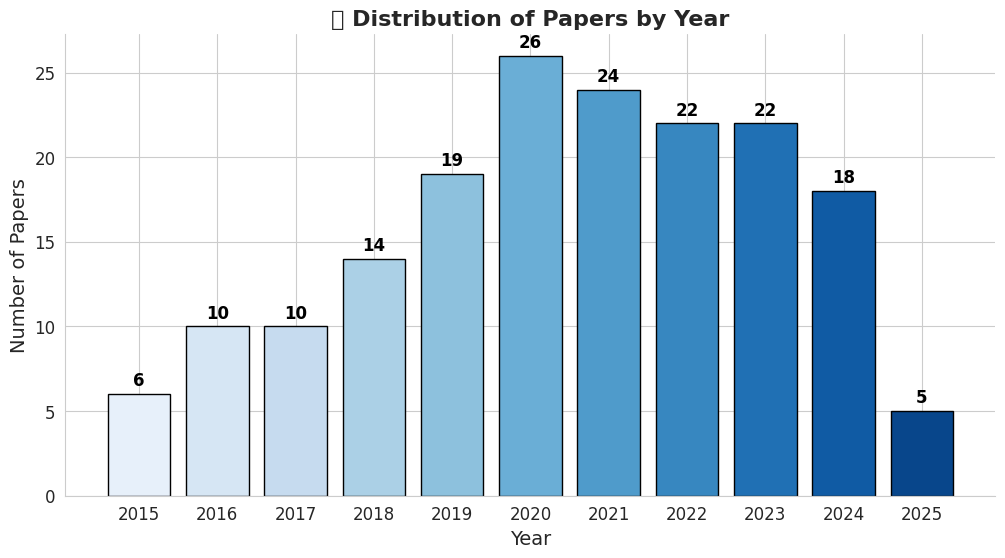

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
papers = [6, 10, 10, 14, 19, 26, 24, 22, 22, 18, 5]

# Apply Seaborn theme
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create bar plot with a gradient color palette
colors = sns.color_palette("Blues", len(years))
plt.bar(years, papers, color=colors, edgecolor="black")

# Labels and title with improved font sizes
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Papers", fontsize=14)
plt.title("📊 Distribution of Papers by Year", fontsize=16, fontweight="bold")

# Add values on top of the bars
for i, v in enumerate(papers):
    plt.text(years[i], v + 0.5, str(v), ha='center', fontsize=12, fontweight="bold", color='black')

# Beautify x-axis ticks
plt.xticks(years, fontsize=12)
plt.yticks(fontsize=12)

# Remove top and right borders
sns.despine()

# Show the chart
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


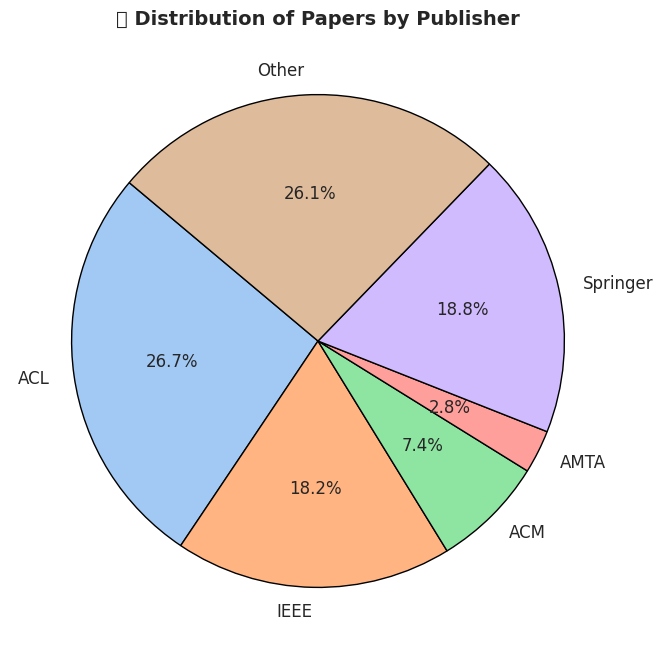

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
publishers = ["ACL", "IEEE", "ACM", "AMTA", "Springer", "Other"]
paper_counts = [47, 32, 13, 5, 33, 46]

# Apply Seaborn styling
sns.set_style("whitegrid")
colors = sns.color_palette("pastel")  # Soft pastel colors for aesthetics

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(paper_counts, labels=publishers, autopct='%1.1f%%', colors=colors,
        startangle=140, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})

# Title
plt.title("📚 Distribution of Papers by Publisher", fontsize=14, fontweight="bold")

# Show chart
plt.show()